## Microsoft Capstone for MariBelajar.org
**Subtheme: Education**

Driver file 1 for FY21 ✈ 
- Contains encoded and cleaned FY21 data 
- Data columns are used from the feature selection and engineering 
- Data will then be used for **RF** models to process moving forward

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
pip install category_encoders

     |████████████████████████████████| 82 kB 327 kB/s 


In [ ]:
# Loading excel to dataframe
fy21_cleaned_encoded = pd.read_excel('/content/drive/My Drive/MariBelajar/FY21_Encoded.xlsx')

In [ ]:
fy21_cleaned_encoded.shape

(308, 16)

In [ ]:
fy21_samp = fy21_cleaned_encoded[:154]
fy21_samp.shape

In [ ]:
fy21_cleaned_encoded = fy21_samp

In [ ]:
fy21_cleaned_encoded.head()

,Unnamed: 0,FiscalYear,Quarter_Q1,Quarter_Q2,Quarter_AY21,TanggalPelaksanaan,Durasi/Jam,NamaKegiatan,Program,Segmen_HE,Segmen_HEK12,Segmen_K12,Segmen_Corporate,GovernmentOfficial,Non-GovernmentOfficial,TotalPeserta
0,0,2021.0,1.0,0.0,0.0,2020-09-15,4.0,Azure Fundamental for Higher Ed,Azure Higher Ed,1.0,0.0,0.0,0.0,12.0,10.0,22.0
1,1,2021.0,1.0,0.0,0.0,2020-09-22,4.0,Designing Azure for Academic Infrastructure,Azure Higher Ed,1.0,0.0,0.0,0.0,22.0,31.0,53.0
2,2,2021.0,1.0,0.0,0.0,2020-09-28,4.0,Designing Virtual Labs with Azure,Azure Higher Ed,1.0,0.0,0.0,0.0,18.0,13.0,31.0
3,3,2021.0,1.0,0.0,0.0,2020-09-04,3.0,Creating A Virtual Classroom using Microsoft T...,GTP,1.0,0.0,0.0,0.0,96.0,0.0,96.0
4,4,2021.0,1.0,0.0,0.0,2020-09-28,6.0,Creating Smart Classroom with Microsoft 365,GTP,1.0,0.0,0.0,0.0,39.0,0.0,39.0


## Choosing which features for the prediction

Manually without any feature selection algorithms:

In [ ]:
X = fy21_cleaned_encoded.drop(labels=['Unnamed: 0', 'TotalPeserta','NamaKegiatan','Program','TanggalPelaksanaan','FiscalYear','GovernmentOfficial','Non-GovernmentOfficial'],axis=1) # Independent variable
y = fy21_cleaned_encoded['TotalPeserta'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [ ]:
X.head()

,Quarter_Q1,Quarter_Q2,Quarter_AY21,Durasi/Jam,Segmen_HE,Segmen_HEK12,Segmen_K12,Segmen_Corporate
0,1.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0


In [ ]:
y.head()

0    22.0
1    53.0
2    31.0
3    96.0
4    39.0
Name: TotalPeserta, dtype: float64

In [ ]:
X.dtypes.sample()

Segmen_Corporate    float64
dtype: object

In [ ]:
np.isnan(X)

,Quarter_Q1,Quarter_Q2,Quarter_AY21,Durasi/Jam,Segmen_HE,Segmen_HEK12,Segmen_K12,Segmen_Corporate
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
149,False,False,False,False,False,False,False,False
150,False,False,False,False,False,False,False,False
151,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False


Using Random Forest:

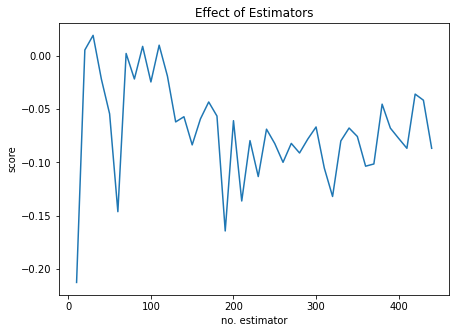

In [ ]:
model = RandomForestRegressor(n_jobs=-1)

# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 450, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))


In [ ]:
predictions = model.predict(X_test)
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

'Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)

'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))


model = RandomForestRegressor(n_estimators=10, 
                               bootstrap = True)
# Fit on training data
model.fit(X_train, y_train)

# Actual class predictions
rf_predictions = model.predict(X_test)

comparison_fy21= y_test.to_frame()
comparison_fy21.columns = ['Actual_Participants']
comparison_fy21['Predicted_Participants'] = rf_predictions
comparison_fy21


,Actual_Participants,Predicted_Participants
48,33.0,90.061896
57,127.0,90.061896
19,87.0,34.560224
125,80.0,44.460989
110,5.0,87.602974
11,43.0,48.294444
26,47.0,34.560224
49,23.0,90.061896
30,67.0,34.560224
99,439.0,137.382143


Using a Linear Model:

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const               28.219349
Quarter_Q1          11.132096
Quarter_Q2          -0.559574
Quarter_AY21        17.646827
Durasi/Jam           5.349697
Segmen_HE            8.427553
Segmen_HEK12         5.194755
Segmen_K12          14.597041
Segmen_Corporate     0.000000
dtype: float64

In [ ]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           TotalPeserta   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8969
Date:                Thu, 25 Nov 2021   Prob (F-statistic):              0.486
Time:                        14:41:46   Log-Likelihood:                -591.17
No. Observations:                 107   AIC:                             1194.
Df Residuals:                     101   BIC:                             1210.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               28.2193     14.529  

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1755: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


Looking at some key statistics from the summary
The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance

1. The coefficient for Durasi/Jam is 5.3497, with a very low p value of 0.562
The coefficient is statistically significant. So the association may not be purely by chance if we can divide the independent variable to just purely be Durasi/Jam.


2. R - squared is 0.043
Meaning that only 4% of the variance in peserta is explained by the independent variables, Quarter, Segmen, and Durasi/Jam. 

This is a **NOT** a good R-squared value.

In [ ]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


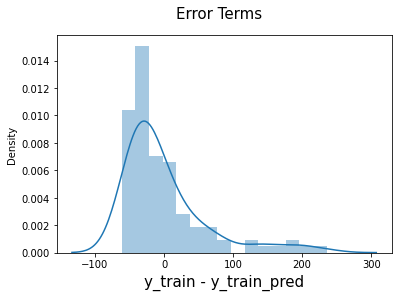

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()

48     52.956210
57     52.956210
19     52.136419
125    64.993123
110    46.786722
dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

72.65617593394187

In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

-0.055201398274515645

To conclude, the results are bad with this dataset even with one hot encoding.
Hypothesis is because the independent variables have almost zero correlation to the dependent variable. 